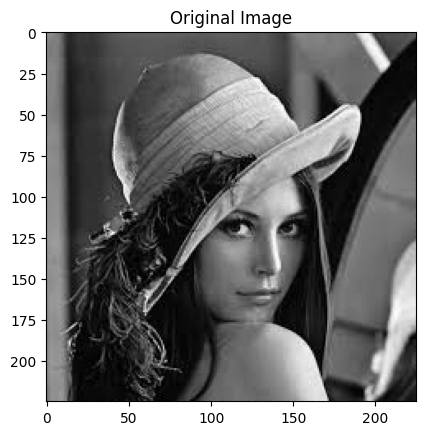

In [ ]:
import cv2
import numpy as np
from skimage import filters
import matplotlib.pyplot as plt

image_path = "lena_gray.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title("Original Image")
plt.show()

Image Size: 225x225, Channels: 3
Total Pixels: 50625


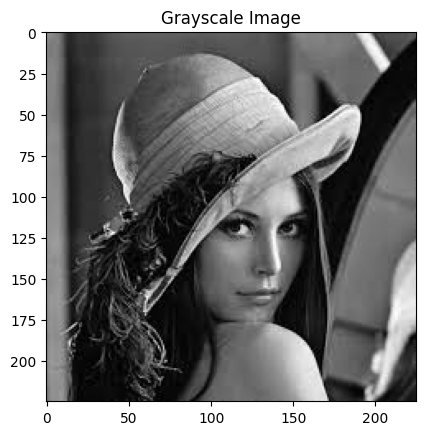

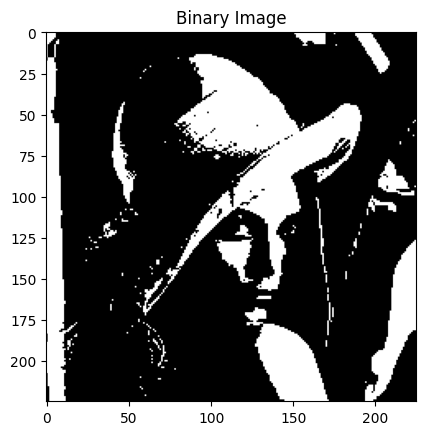

Black Pixel Count: 38591
Binary Image Size: (225, 225)


In [ ]:
height, width, channels = image.shape
print(f"Image Size: {width}x{height}, Channels: {channels}")
total_pixels = height * width
print(f"Total Pixels: {total_pixels}")

gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.show()

_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
plt.imshow(binary_image, cmap='gray')
plt.title("Binary Image")
plt.show()
black_pixel_count = np.sum(binary_image == 0)
print(f"Black Pixel Count: {black_pixel_count}")
print(f"Binary Image Size: {binary_image.shape}")

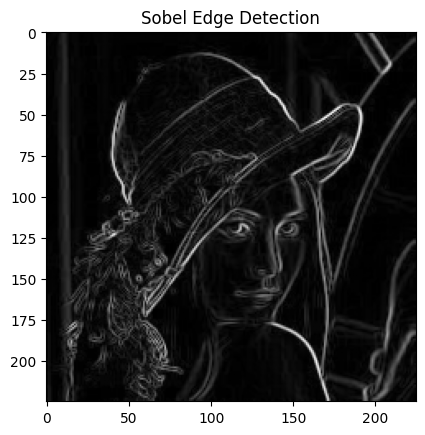

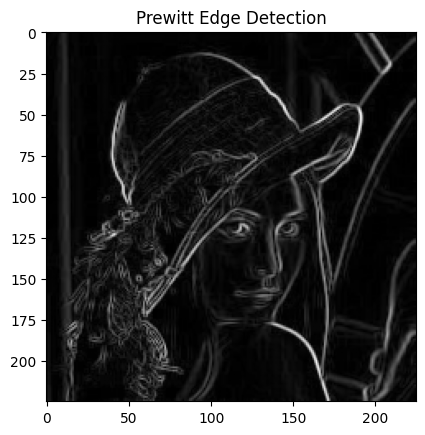

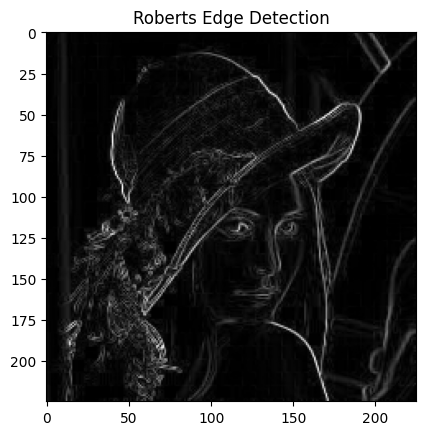

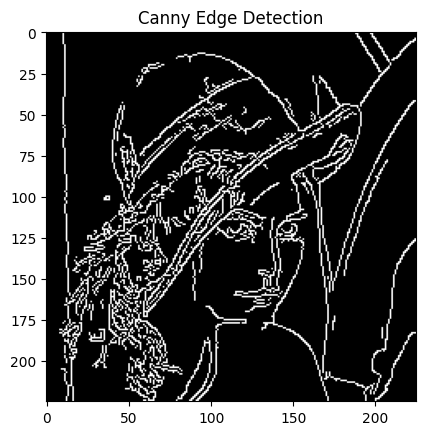

In [ ]:
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
sobel = np.hypot(sobel_x, sobel_y)
plt.imshow(sobel, cmap='gray')
plt.title("Sobel Edge Detection")
plt.show()

prewitt_x = filters.prewitt_h(gray_image)
prewitt_y = filters.prewitt_v(gray_image)
prewitt = np.hypot(prewitt_x, prewitt_y)
plt.imshow(prewitt, cmap='gray')
plt.title("Prewitt Edge Detection")
plt.show()

roberts = filters.roberts(gray_image)
plt.imshow(roberts, cmap='gray')
plt.title("Roberts Edge Detection")
plt.show()

canny = cv2.Canny(gray_image, 100, 200)
plt.imshow(canny, cmap='gray')
plt.title("Canny Edge Detection")
plt.show()

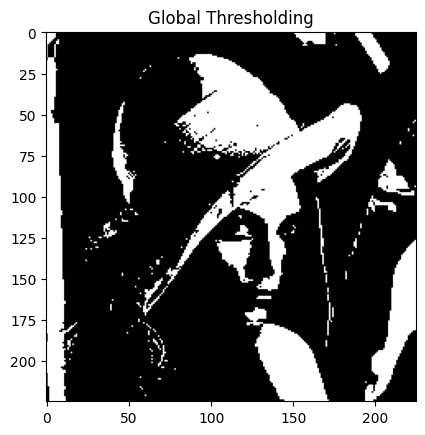

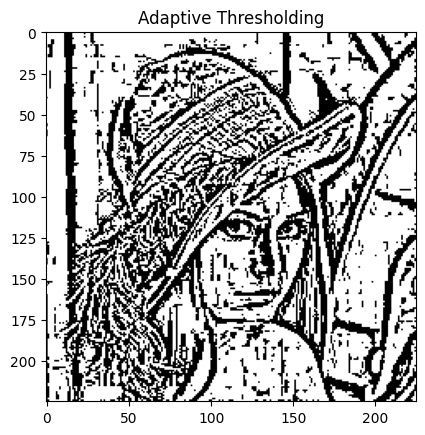

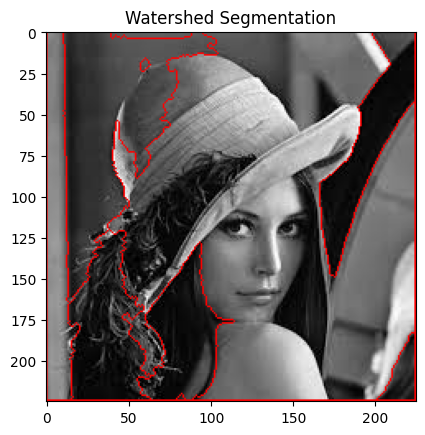

In [ ]:
_, global_thresh = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
plt.imshow(global_thresh, cmap='gray')
plt.title("Global Thresholding")
plt.show()

adaptive_thresh = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
plt.imshow(adaptive_thresh, cmap='gray')
plt.title("Adaptive Thresholding")
plt.show()

ret, thresh = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
sure_bg = cv2.dilate(opening, kernel, iterations=3)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)
markers = cv2.connectedComponents(sure_fg)[1]
markers += 1
markers[unknown == 255] = 0
image_color = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR)
cv2.watershed(image_color, markers)
image_color[markers == -1] = [255, 0, 0]
plt.imshow(image_color)
plt.title("Watershed Segmentation")
plt.show()